Яндекс.Музыка проводит офлайн-фестиваль самых популярных исполнителей жанра техно. Чтобы привлечь пользователей на мероприятие, маркетолог Иван должен разослать email пользователям Музыки. Отправка одного письма стоит 10 рублей, а цена билета составляет 700 рублей. Как бы вы посоветовали Ивану сформировать выборку для отправки, учитывая логи прослушиваний пользователей Яндекс.Музыки?



## Загрузка и обзор данных

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('music_data.csv')

In [4]:
data.head()

,Unnamed: 0,audition_id,track_duration,track_genre,track_id,user_id,utc_audition_end_dttm,utc_audition_start_dttm
0,0,3fecd60bf5564de7bb0064335f482b4d,336.629082,RAP,efd614e5-239a-418e-b39c-181b43719b62,a72d73ea124840698aa8,2021-02-28T12:32:10.776000Z,2021-02-28T12:31:01.865000Z
1,1,8ae1703df8354ee6b8d39ce2ceae4508,428.797846,VOCAL,d4697e6e-698a-41e8-8e15-ec890c94751e,066cc9287de340f281ba,2021-01-19T12:13:43.369000Z,2021-01-19T12:12:48.185000Z
2,2,44383125d98a4d939e7f294602674fc6,463.467143,METAL,e006afab-c832-4d07-8cd0-7d4a9c2aabe8,95ed23b52b104f66b4b1,2021-02-27T19:53:57.143000Z,2021-02-27T19:52:42.470000Z
3,3,a90b74992c9f4046a68935cb83ced7ee,323.746259,HARDROCK,c2ea845c-fcba-480a-b41a-d58bf9493375,b0a6dcec6f604b50b37e,2021-02-24T01:51:44.526000Z,2021-02-24T01:46:25.549000Z
4,4,0d98a88fba0a4dc3bb0444089a0ce16b,316.888403,POP,ad68738c-2a38-4e0f-910a-71bb0aa0a0c0,6788b1c78a724de488c9,2020-12-24T05:04:32.855000Z,2020-12-24T05:00:09.645000Z


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842397 entries, 0 to 842396
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               842397 non-null  int64  
 1   audition_id              842397 non-null  object 
 2   track_duration           842397 non-null  float64
 3   track_genre              842397 non-null  object 
 4   track_id                 842397 non-null  object 
 5   user_id                  842397 non-null  object 
 6   utc_audition_end_dttm    842397 non-null  object 
 7   utc_audition_start_dttm  842397 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 51.4+ MB


У нас имеется информация о 842397 прослушиваний разными пользователями.
Обозначения в таблице:
* audition_id – ID прослушивания в логе
* utc_audition_start_dttm – дата начала прослушивания в формате YYYY-MM-DD hh:mm:ss
* utc_audition_end_dttm – дата окончания прослушивания в формате YYYY-MM-DD hh:mm:ss
* user_id – ID пользователя Яндекс.Музыки
* track_id – ID трека Яндекс.Музыки
* track_duration – продолжительность трека в секундах
* track_genre – жанр трека

Переведем время и дату в формат datetime

In [8]:
data['utc_audition_end_dttm'] = pd.to_datetime(data['utc_audition_end_dttm'])
data['utc_audition_start_dttm'] = pd.to_datetime(data['utc_audition_start_dttm'])

In [10]:
data.head()

,Unnamed: 0,audition_id,track_duration,track_genre,track_id,user_id,utc_audition_end_dttm,utc_audition_start_dttm
0,0,3fecd60bf5564de7bb0064335f482b4d,336.629082,RAP,efd614e5-239a-418e-b39c-181b43719b62,a72d73ea124840698aa8,2021-02-28 12:32:10.776000+00:00,2021-02-28 12:31:01.865000+00:00
1,1,8ae1703df8354ee6b8d39ce2ceae4508,428.797846,VOCAL,d4697e6e-698a-41e8-8e15-ec890c94751e,066cc9287de340f281ba,2021-01-19 12:13:43.369000+00:00,2021-01-19 12:12:48.185000+00:00
2,2,44383125d98a4d939e7f294602674fc6,463.467143,METAL,e006afab-c832-4d07-8cd0-7d4a9c2aabe8,95ed23b52b104f66b4b1,2021-02-27 19:53:57.143000+00:00,2021-02-27 19:52:42.470000+00:00
3,3,a90b74992c9f4046a68935cb83ced7ee,323.746259,HARDROCK,c2ea845c-fcba-480a-b41a-d58bf9493375,b0a6dcec6f604b50b37e,2021-02-24 01:51:44.526000+00:00,2021-02-24 01:46:25.549000+00:00
4,4,0d98a88fba0a4dc3bb0444089a0ce16b,316.888403,POP,ad68738c-2a38-4e0f-910a-71bb0aa0a0c0,6788b1c78a724de488c9,2020-12-24 05:04:32.855000+00:00,2020-12-24 05:00:09.645000+00:00


## Формирование выборки

Наша основная аудитория, пользователи, которые слушали жанр техно. Посмотрим, сколько у нас таких пользователей

In [27]:
all_users = data['user_id'].nunique()
tecno_users = data.loc[data['track_genre'] == 'TECHNO', 'user_id'].nunique()
print(f'Все пользвоатели {all_users}')
print(f'Слушали техно {tecno_users}')

Все пользвоатели 1727
Слушали техно 1727


У нас у все пользователей был жанр техно, кажется, что чтобы сформировать выборку, нам нужно понять, сколько по времени пользователи слушают техно, от общего числа прослушивний.

In [38]:
data['audition_duration'] = (data['utc_audition_end_dttm'] - data['utc_audition_start_dttm']) / np.timedelta64(1, 's')
data.head()

,Unnamed: 0,audition_id,track_duration,track_genre,track_id,user_id,utc_audition_end_dttm,utc_audition_start_dttm,audition_duration
0,0,3fecd60bf5564de7bb0064335f482b4d,336.629082,RAP,efd614e5-239a-418e-b39c-181b43719b62,a72d73ea124840698aa8,2021-02-28 12:32:10.776000+00:00,2021-02-28 12:31:01.865000+00:00,68.911
1,1,8ae1703df8354ee6b8d39ce2ceae4508,428.797846,VOCAL,d4697e6e-698a-41e8-8e15-ec890c94751e,066cc9287de340f281ba,2021-01-19 12:13:43.369000+00:00,2021-01-19 12:12:48.185000+00:00,55.184
2,2,44383125d98a4d939e7f294602674fc6,463.467143,METAL,e006afab-c832-4d07-8cd0-7d4a9c2aabe8,95ed23b52b104f66b4b1,2021-02-27 19:53:57.143000+00:00,2021-02-27 19:52:42.470000+00:00,74.673
3,3,a90b74992c9f4046a68935cb83ced7ee,323.746259,HARDROCK,c2ea845c-fcba-480a-b41a-d58bf9493375,b0a6dcec6f604b50b37e,2021-02-24 01:51:44.526000+00:00,2021-02-24 01:46:25.549000+00:00,318.977
4,4,0d98a88fba0a4dc3bb0444089a0ce16b,316.888403,POP,ad68738c-2a38-4e0f-910a-71bb0aa0a0c0,6788b1c78a724de488c9,2020-12-24 05:04:32.855000+00:00,2020-12-24 05:00:09.645000+00:00,263.210


In [48]:
#Собираем все время прослушиваний для пользвоателей
full_duration = data.groupby('user_id', as_index=False).agg({'audition_duration': 'sum'})
#Прослушивание техно
techno_duration = data.loc[data['track_genre'] == 'TECHNO'].groupby('user_id', as_index=False).agg({'audition_duration': 'sum'})
techno_duration.rename(columns={'audition_duration': 'techno_duration'}, inplace = True)

In [50]:
techno_duration

,user_id,techno_duration
0,002123faf66b47b5aafa,6398.402
1,0041383820e248e487a6,22007.036
2,008005a451764a63aa3f,12601.688
3,00c017dc34254d39a390,17279.222
4,00f628a2f8044ae18d88,11253.504
...,...,...
1722,ff77d34a23c04d36a421,9823.367
1723,ff9b606118d449f1ab15,8166.387
1724,ffa2421c514844c087f3,8799.071
1725,ffa5ecacdcfb466d8e91,11693.664


In [53]:
#Сджойним таблицы и найдем долю прослушиваний техно
full_duration = full_duration.merge(techno_duration, on='user_id', how='left')
full_duration['ratio'] = full_duration['techno_duration'] / full_duration['audition_duration']

Построим распределеление

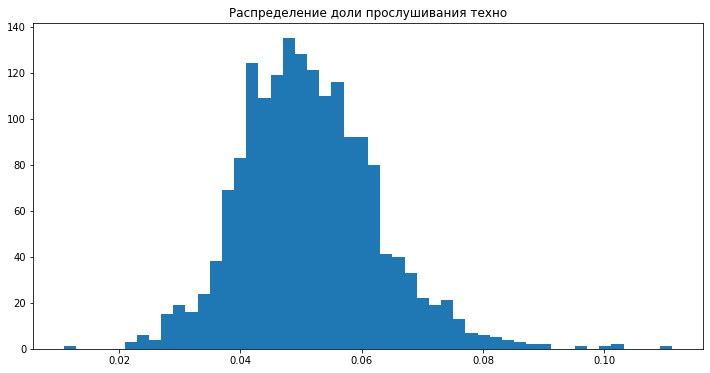

In [61]:
plt.figure(figsize=(12, 6))
plt.title('Распределение доли прослушивания техно')
plt.hist(full_duration['ratio'], bins=50);

Распределение получилось похожим на нормальное, только есть аутлайеры. Кажется, что левый хвост мало заинтересован в техно, и врятли прийдет на фестиваль. Кто много слушает, скорее всего и так знают про фест и собираются на него прийти. Значит нужно разослать середине распределения. 

С каждой стороны уберем по 10% потозователей, которые не нуждаются в рассылке.

In [68]:
users_fest = full_duration.loc[(full_duration['ratio'] > np.quantile(full_duration['ratio'], 0.1)) & 
                               (full_duration['ratio'] < np.quantile(full_duration['ratio'], 0.9))]

In [69]:
users_fest['user_id']

0       002123faf66b47b5aafa
1       0041383820e248e487a6
2       008005a451764a63aa3f
3       00c017dc34254d39a390
4       00f628a2f8044ae18d88
                ...         
1721    ff457d71e1c9414e92b5
1722    ff77d34a23c04d36a421
1723    ff9b606118d449f1ab15
1725    ffa5ecacdcfb466d8e91
1726    ffe8e02a691746d18159
Name: user_id, Length: 1381, dtype: object

Этим 1381 пользователелям можно отправить рассылку